**Import the required libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import seaborn as sn

import numpy as np

**Load the Data**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**MNIST Dataset downloaded and locally cached at ~/.keras/datasets**

In [3]:
!ls ~/.keras/datasets

mnist.npz


**Size of Training and Testing Dataset and right aligned it.**
:>6 (means digit will take 6 places in total and will align to right)
:>7 (means digit will take 7 places in total and will aign to right)

In [4]:
print(f"Length of Training Dataset{len(X_train):>6}")
print(f"Length of Testing Dataset{len(X_test):>7}")

Length of Training Dataset 60000
Length of Testing Dataset  10000


**Shape and dimenion of single Image**

In [5]:
print(f"Shape of Single Image {X_train[0].shape}")
print(f"Dimenstion of Single Image {X_train[0].ndim}")
print(f"Type of Single Image {type(X_train[0])}")
print(f"Type of Input Data {type(X_train)}")

Shape of Single Image (28, 28)
Dimenstion of Single Image 2
Type of Single Image <class 'numpy.ndarray'>
Type of Input Data <class 'numpy.ndarray'>


**Check the values of 1 Image array values** 
0 - means Black ; 255 means White

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Scale the array by dividing array with 255. So all values of array will be in range 0 to 1**

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Look at First five Image**

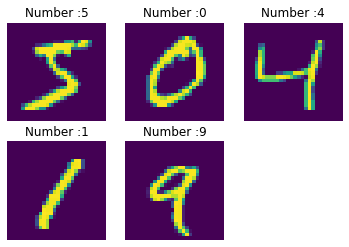

In [9]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  title = "Number :"+ str(y_train[i])
  plt.title(title)
  plt.axis("off")
plt.show()

**Flatten the Input 2D array and check the flatten shape and dimension**

In [10]:
print(f"Shape of X_train:{X_train.shape}")

Shape of X_train:(60000, 28, 28)


In [11]:
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[2])

In [12]:
print(f"Shape of X_train_flatten array:{X_train_flatten.shape}")
print(f"Shape of X_test_flatten array:{X_test_flatten.shape}")

Shape of X_train_flatten array:(60000, 784)
Shape of X_test_flatten array:(10000, 784)


In [13]:
print(f"Shape of 1 flatten image {X_train_flatten[0].shape}")
print(f"Dimension of 1 flatten image {X_train_flatten[0].ndim}")

Shape of 1 flatten image (784,)
Dimension of 1 flatten image 1


**Create a Neural Network with One Input Layer, One Hidden Layer and One Output Layer**

Input Layer has 784 Neurons (equal to number of features)

Hidden Layer has 100 Neurons (It''s up to us)

Output Layer has 10 Neurons (equal to number of labels)

In Last Layer (i.e. output Layer, we don't need to mention Input_shape. It will automaically picked/checked from previous hidden layer)

In [16]:
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                          keras.layers.Dense(10, activation="sigmoid")
                          ])

**Visualize the Keras Model**

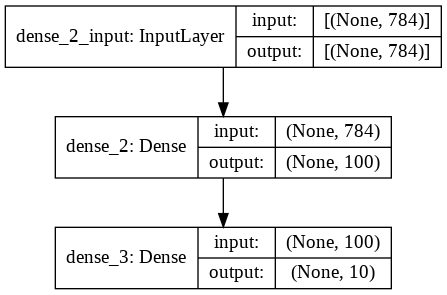

In [17]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True
)

**Compile the Model**

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Fit the model**

In [19]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4519 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0908 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9849


**Find accuracy on Test DataSet**

In [20]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9748


[0.0795123353600502, 0.9747999906539917]

**We have noticed that after adding 1 hidden layer only, Both training and test accuracy get increases**

**Draw and Predict 2-3 Images only**

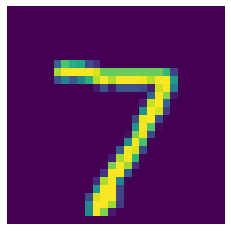

In [21]:
plt.imshow(X_test[0])
plt.axis("off")
plt.show()

In [22]:
test_predictions = model.predict(X_test_flatten)
test_predictions[0]

array([8.7834924e-02, 6.4013302e-03, 7.6227903e-01, 8.7209982e-01,
       4.4319153e-05, 1.8760562e-04, 2.1188944e-06, 9.9991930e-01,
       8.4993541e-03, 3.5160035e-02], dtype=float32)

In [23]:
test_predictions_label = [i.argmax() for i in test_predictions]

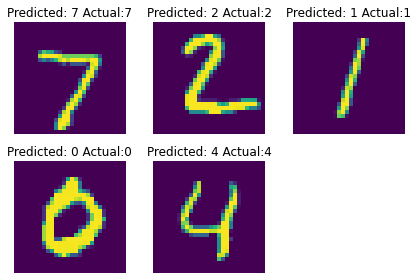

In [24]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i])
  title = "Predicted: "+str(test_predictions_label[i])+" Actual:"+str(y_test[i])
  plt.title(title)
  plt.axis("off")
  plt.tight_layout()
plt.show()

**Confusion Matrix**

Computes the confusion matrix between predictions and actual labels

Row - represents the actual Labels
Column - represents the predicted Labels

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=test_predictions_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    0,    3,    2,    3,    0],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   4,    1, 1007,    6,    5,    0,    2,    3,    3,    1],
       [   0,    1,    1,  995,    1,    0,    0,    6,    3,    3],
       [   2,    0,    5,    0,  962,    0,    2,    1,    2,    8],
       [   2,    1,    1,   26,    2,  841,    8,    1,    5,    5],
       [   3,    4,    3,    1,    5,    5,  936,    0,    1,    0],
       [   1,    8,   10,    3,    2,    0,    0,  993,    2,    9],
       [   4,    1,    3,   11,    5,    3,    1,    3,  940,    3],
       [   3,    6,    0,    5,    8,    1,    0,    5,    2,  979]],
      dtype=int32)>

**Plot or Visualize the Confusion Matrix**

annot = True (i.e. show the numbers of matrix)

fmt = 'd' (i.e. show the number in decimal format)

Text(69.0, 0.5, 'Actual')

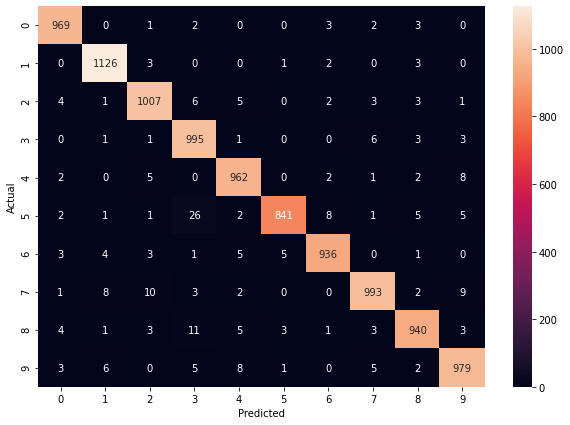

In [26]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

**By looking at Heat Map or Confusion Matrix, It has been noticed that Just 1 adding 1 hidden layer - accuracy improves, and number of correct prediction increases and number of wrong predections decreases**

**In above code, Before fitting the model, we have flatten the 2D array manually.
If we don't want to flatten the array and want to pass the 2D array as is in fit function.** i.e. model.fit(X_train, y_train)

**For that, we need to add the Flatten Layer in Model Itself as a First Layer, like below**

In 2nd Layer, we dont need to mention the shape as it will figure it own.

In [29]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation="sigmoid")
                          ])

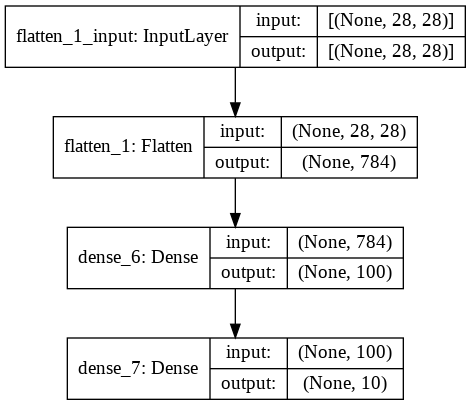

In [31]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True
)